<a href="https://colab.research.google.com/github/phanmanhtung/Machine-Learning-and-Data-Mining-2/blob/master/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ggcolab/'  #change dir to your project folder

KeyboardInterrupt: ignored

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

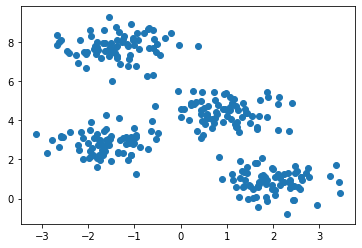

In [0]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# X - data points
# y - labels (0, 1, 2, 3)

plt.scatter(X[:,0], X[:,1])

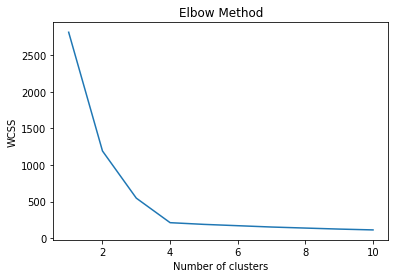

In [0]:
# For multiple dimension data -> hard to visualize -> optimum number of cluster is not obvious
# Try different k -> quantify the badness with Total variation (WCSS)
# Elbow: after a certain point, total variation goes down slowly

# We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS)
# then we select the number of clusters where the change in WCSS begins to level off (elbow method).

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

NameError: ignored

In [0]:
  # Breast cancer dataset

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  column = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
            "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
  df = pd.read_csv("/content/gdrive/My Drive/breast-cancer-wisconsin.data", sep=',', header=None, skipinitialspace=True)
  df.columns = column

  # Save the class information
  myclass = df["Class"]
  # class: 2 for benign, 4 for malignant

  # Set the ID number as index
  df.set_index("Sample code number", inplace=True)

  # Get rid of class column for statistical analysis and PCA, append it latter
  df.drop(['Class'],axis=1, inplace=True)

df.head()

IndentationError: ignored

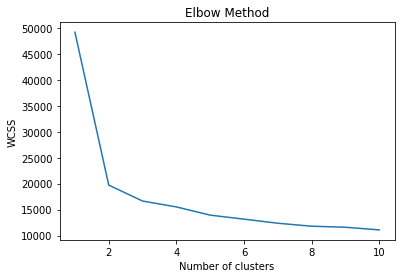

In [0]:
from sklearn.cluster import KMeans

X = df.replace("?", 1).values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10)
# Explain the initialization:
# n_clusters=2: number of clusters is 2
# init=‘random’: choose k observations at random from data for the initial centroids
# max_iter=300: Maximum number of iterations of the k-means algorithm for a single run

pred_y = kmeans.fit_predict(X)

# Turn 0, 1 values into 2, 4 values
  my_pred_y = []
  for i in pred_y:
    if(i==0):
      my_pred_y.append(2)
    else:
      my_pred_y.append(4)

  from sklearn import metrics
  # Accuracy reflects the proportion of objects that were correctly assigned
  print("Accuracy: ", metrics.accuracy_score(myclass.values, my_pred_y))

  # Rand index computes how similar the obtained clusters are to the benchmark classifications
  print("Rand index: ", metrics.adjusted_rand_score(myclass.values, my_pred_y))

Accuracy:  0.04148783977110158
Rand index:  0.839053994351602


[65.4  8.6]


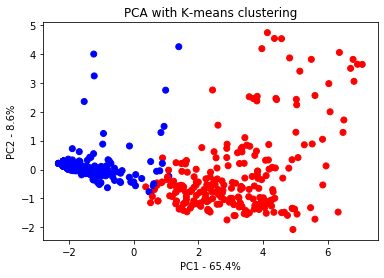

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Fill unknown value with 1
df.replace("?", 1, inplace=True)

scaled_data = preprocessing.scale(df)
 
pca = PCA(n_components=2) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(pca_data, columns=labels)

# Label class using my_pred_y instead of myclass
pca_df['Class'] = my_pred_y

colors = {2:'red', 4:'blue'}

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df['Class'].apply(lambda x: colors[x]))
plt.title('PCA with K-means clustering')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [0]:
pca_df['Class'] = myclass

colors = {2:'red', 4:'blue'}

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df['Class'].apply(lambda x: colors[x]))
plt.title('PCA with original labels')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

NameError: ignored

In [0]:
column = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv("/content/gdrive/My Drive/iris.data", sep=',', header=None)
df.columns = column
myclass = df["class"]
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


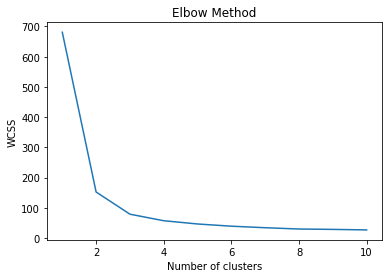

In [0]:
X = df.drop(["class"],axis=1).values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[72.8 23. ]


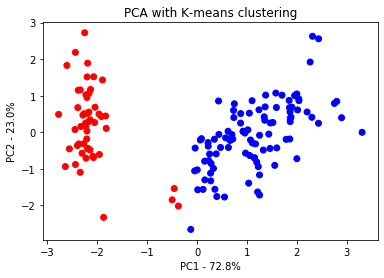

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

df.drop(['class'], axis=1, inplace=True)
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

scaled_data = preprocessing.scale(df)
 
pca = PCA(n_components=2) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(pca_data, columns=labels)

# Label class using my_pred_y instead of myclass
pca_df['Class'] = pred_y

colors = {0:'red', 1:'blue'}

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df['Class'].apply(lambda x: colors[x]))
plt.title('PCA with K-means clustering')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.show()

In [0]:
print(metrics.davies_bouldin_score(X, pred_y))

print(metrics.calinski_harabasz_score(X, pred_y))

0.4048341363918299
513.3038433517568
